## DATA ANALYTICS & ML FINAL PROJECT : Bank Marketing ##
### 1. Loading Data :

In [1]:
import pandas as pd
df = pd.read_csv("bank-additional-full.csv", sep=';')

df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
print("Initial data info:")
df.info()

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

### 2. Initial Cleaning & Preprocessing :

In [3]:
# Checking for null values
print("Missing values before dropping:\n", df.isnull().sum())

# Checking for duplicates
print("\n\nDuplicate rows:", df.duplicated().sum())
print("\n")

# Checking for unkown values
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print("Unkown values : ")
for col in categorical_cols:
    unknown_count = df[col].value_counts().get('unknown', 0)
    print(f"{col:<12} | 'unknown' count: {unknown_count}")


Missing values before dropping:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Duplicate rows: 12


Unkown values : 
job          | 'unknown' count: 330
marital      | 'unknown' count: 80
education    | 'unknown' count: 1731
default      | 'unknown' count: 8597
housing      | 'unknown' count: 990
loan         | 'unknown' count: 990
contact      | 'unknown' count: 0
month        | 'unknown' count: 0
day_of_week  | 'unknown' count: 0
poutcome     | 'unknown' count: 0


In [4]:
# Deleting duplicate values
df = df.drop_duplicates()

# Replacing Unknown with mode of the column
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])
df['default'] = df['default'].replace('unknown', df['marital'].mode()[0])

### 3. Feature Overview

| **Feature** | **Description** | **Range** |
| :---------- | :-------------- | :-------- |
| **Age** | Age of the client | Numeric |
| **Job** | Type of job | "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown" |
| **Marital** | Marital status | "divorced", "married", "single", "unknown" |
| **Education** | Level of education | "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown" |
| **Default** | Has credit in default? | "no", "yes", "unknown" |
| **Housing** | Has a housing loan? | "no", "yes", "unknown" |
| **Loan** | Has a personal loan? | "no", "yes", "unknown" |
| **Contact** | Type of contact communication | "cellular", "telephone" |
| **Month** | Last contact month | "jan", "feb", "mar", ..., "nov", "dec" |
| **Day_of_week** | Last contact day of the week | "mon", "tue", "wed", "thu", "fri" |
| **Duration** | Last contact duration in seconds *(used only for benchmarking)* | Numeric |
| **Campaign** | Number of contacts in current campaign (includes last contact) | Numeric |
| **Pdays** | Days since last contact from previous campaign (999 means never contacted) | Numeric |
| **Previous** | Number of contacts before this campaign | Numeric |
| **Poutcome** | Outcome of previous marketing campaign | "failure", "nonexistent", "success" |
| **Emp.var.rate** | Employment variation rate (quarterly indicator) | Numeric |
| **Cons.price.idx** | Consumer price index (monthly indicator) | Numeric |
| **Cons.conf.idx** | Consumer confidence index (monthly indicator) | Numeric |
| **Euribor3m** | Euribor 3-month rate (daily indicator) | Numeric |
| **Nr.employed** | Number of employees (quarterly indicator) | Numeric |
| **y (Target)** | Has the client subscribed to a term deposit? | "yes", "no" |

### 4. Exploratory Data Analysis :
#### 1- Numerical Data :

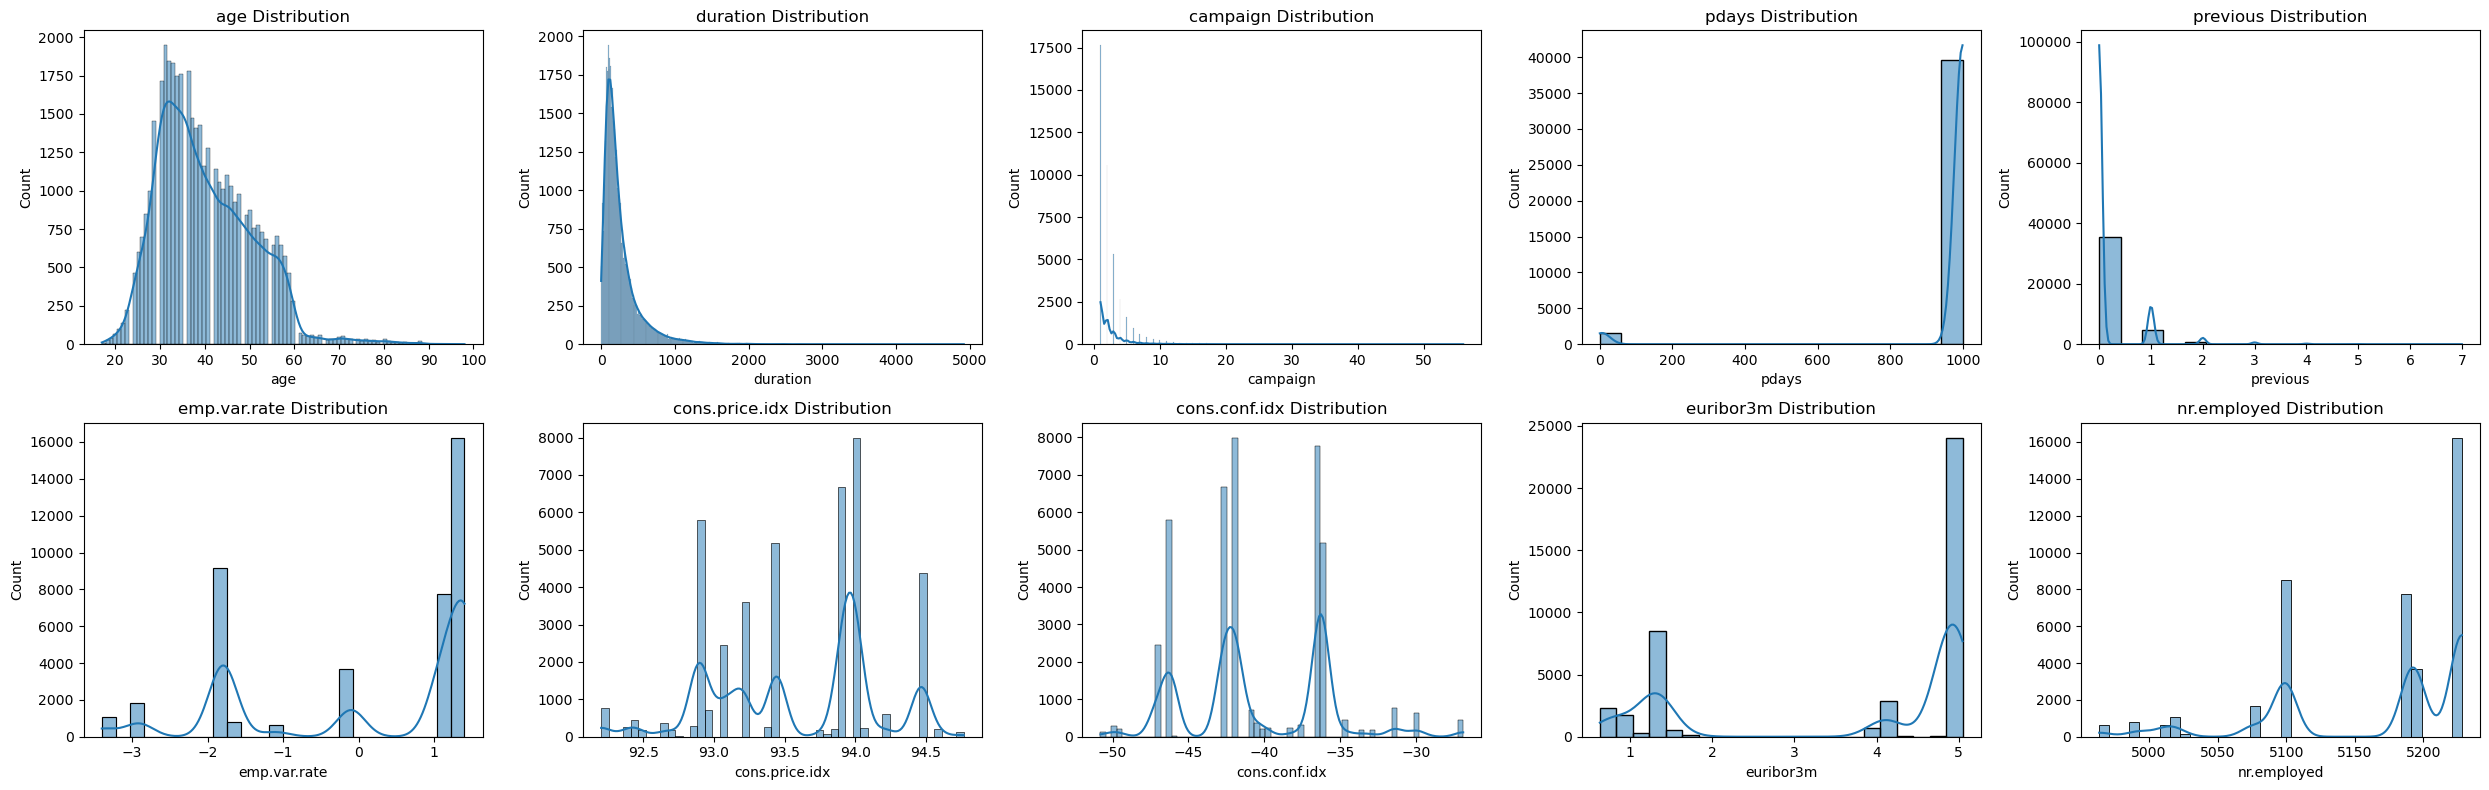

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_df = df.select_dtypes(include='number').columns

n_cols = 5
n_rows = -(-len(numerical_df) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each numerical feature
for i, col in enumerate(numerical_df):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#### 2- Categorical Data :

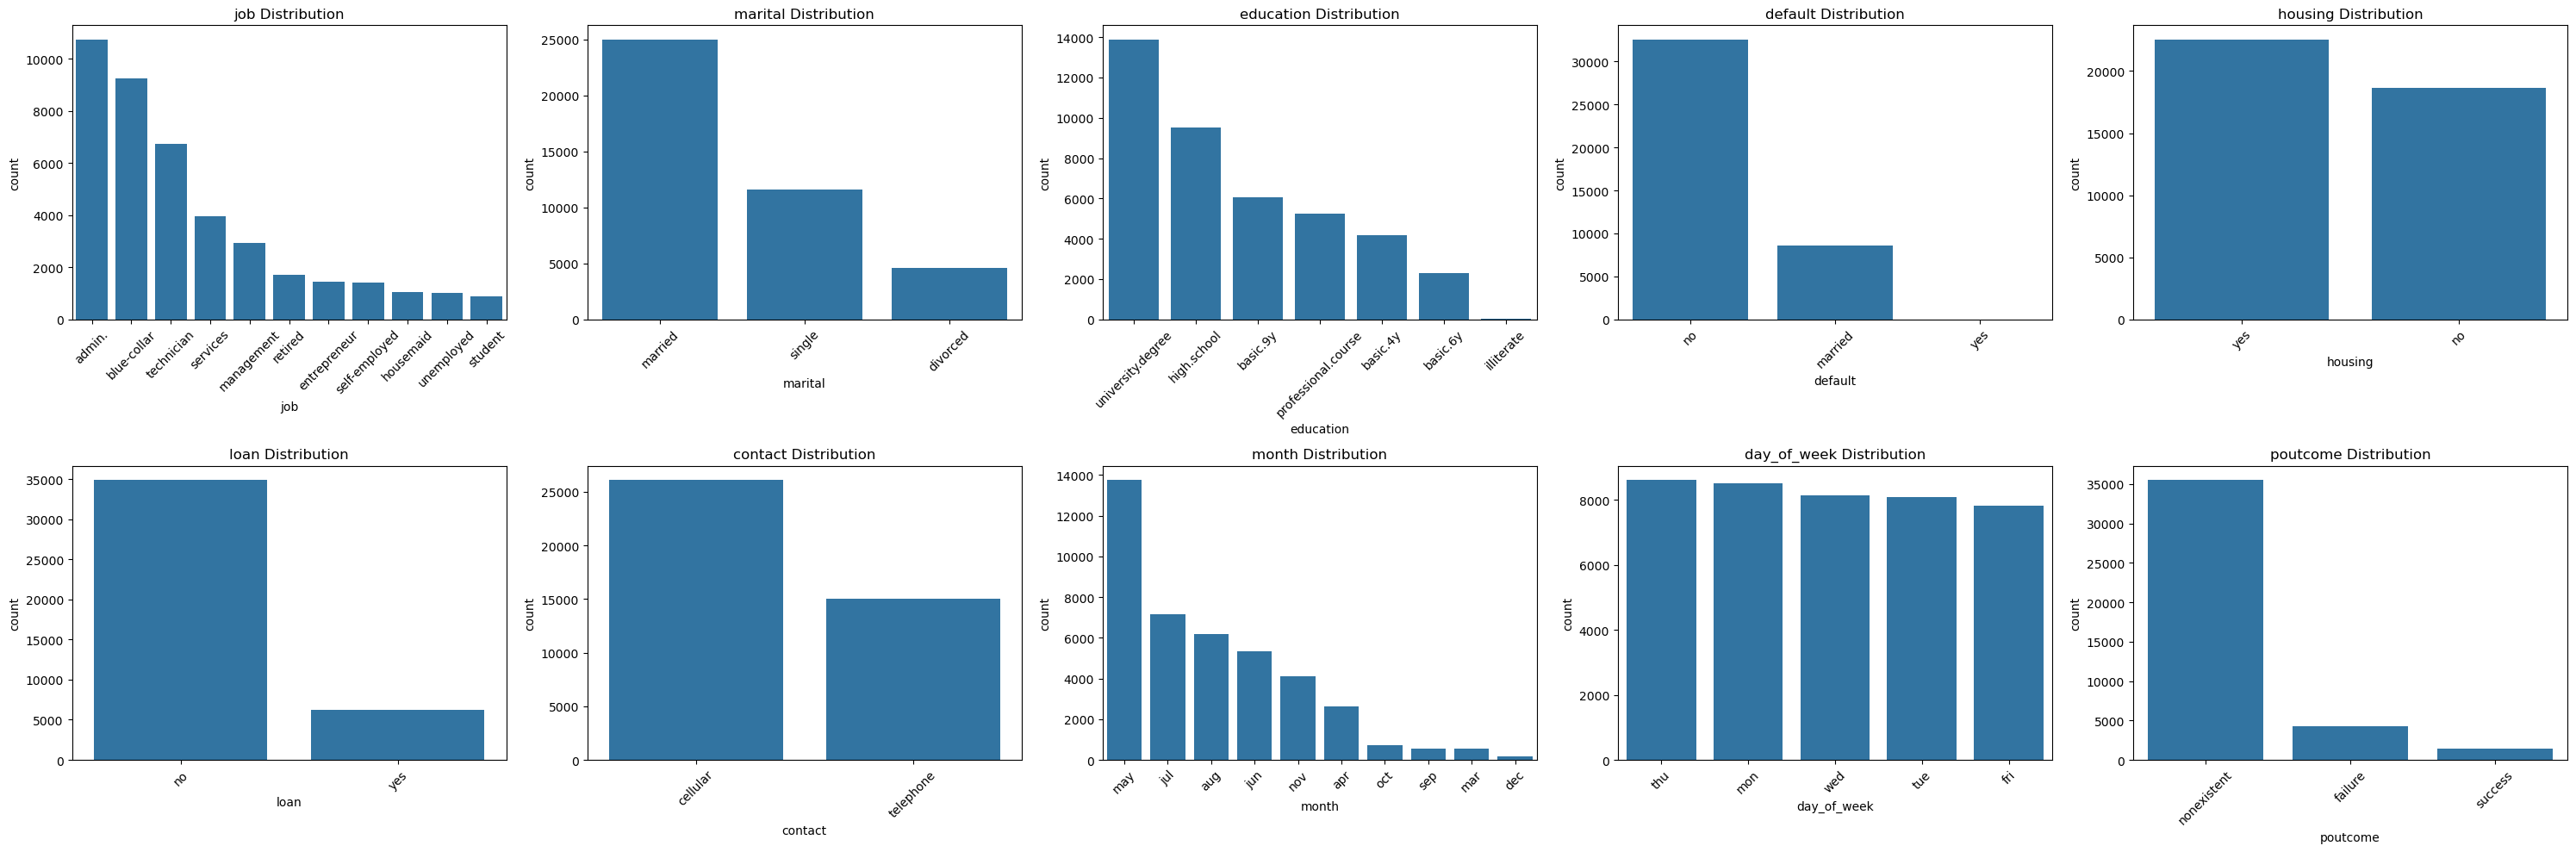

In [6]:
# Select categorical features
categorical_df = df.select_dtypes(include='object').columns

# Exclude the target if needed
categorical_df = [col for col in categorical_cols if col != 'y']

# Grid size
n_cols = 5
n_rows = -(-len(categorical_df) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_df):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 5. Feature Engineering & Transformation:

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# 1- The target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# 2- Numerical values
standard_scaler_cols = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
minmax_scaler_cols = ['duration', 'campaign', 'pdays', 'previous']

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

df[standard_scaler_cols] = scaler_std.fit_transform(df[standard_scaler_cols])
df[minmax_scaler_cols] = scaler_minmax.fit_transform(df[minmax_scaler_cols])

# 3- Categorical values
# One hot encoding for the categories :
onehot_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

# Cyclically encode months using sine and cosine transformations to capture their periodic nature, then drop the original 'month' and temporary 'month_num' columns :
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month_num'] = df['month'].map(month_map)
df['month_sin'] = np.sin(2 * np.pi * df['month_num']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num']/12)
df.drop(columns=['month', 'month_num'], inplace=True)

# Cyclic encoding for education levels :
edu_map = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
}
df['education'] = df['education'].map(edu_map)

### Feature Selection:
#### 1- Correlation analysis:


Calculating Correlation Matrix...


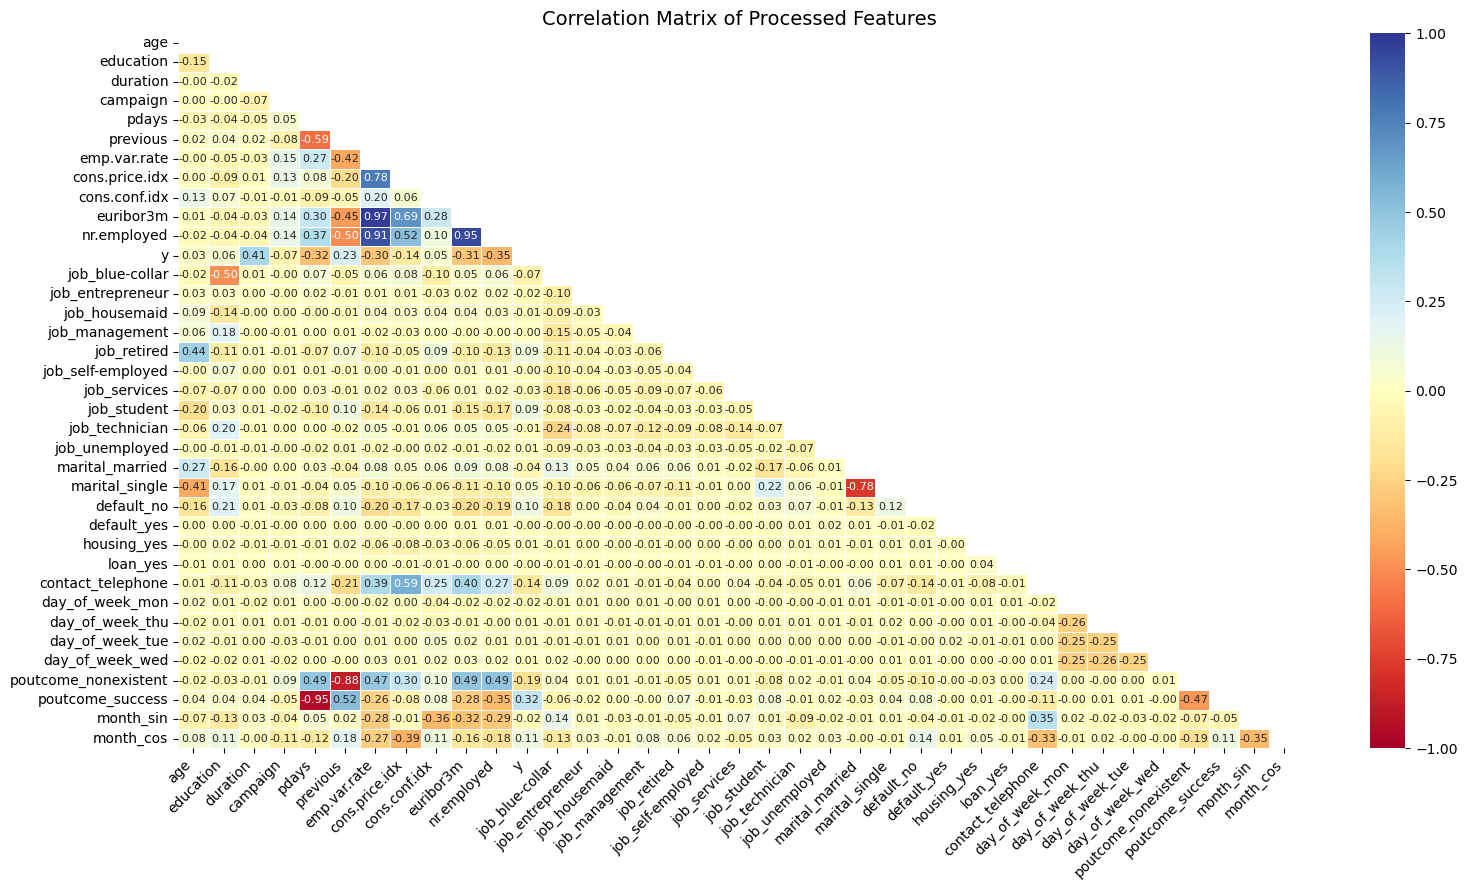

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("\nCalculating Correlation Matrix...")
correlation_matrix = df.corr()

plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, mask=mask, annot_kws={"size": 8})
plt.title('Correlation Matrix of Processed Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Analysis of Correlation Matrix and Feature Selection**

From analyzing the correlation matrix, features with high correlation coefficients (close to 1 or -1) suggest redundancy. To reduce multicollinearity, we are dropping the following features :


| Feature          | Highly Correlated With                          |
|------------------|------------------------------------------------|
| **previous**     | poutcome_nonexistent, nr.employed, euribor3m, ... |
| **pdays**        | poutcome_success, poutcome_nonexistent, previous, ... |
| **emp.var.rate** | euribor3m, cons.price.idx, nr.employed, ... |
| **euribor3m**    | pdays, previous, cons.price.idx, ...       |
| **marital_single**| age, job_student, marital married, ...  |



Calculating Correlation Matrix...


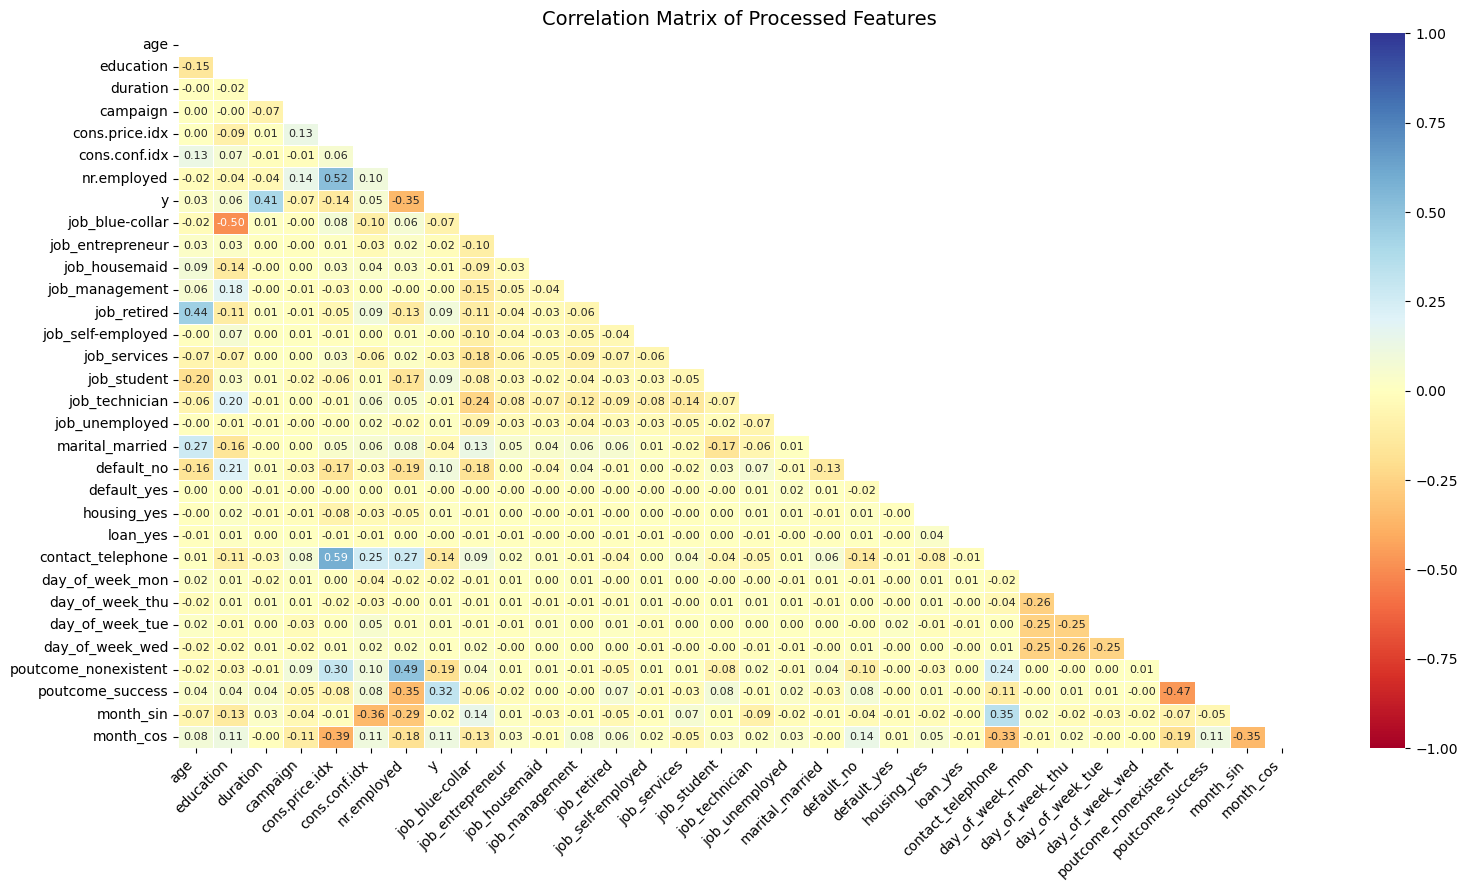

In [9]:
# Dropping features based on correlation 
df.drop(columns=['previous', 'pdays', 'emp.var.rate', 'euribor3m', 'marital_single'], inplace=True)

# Visuallising the difference 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("\nCalculating Correlation Matrix...")
correlation_matrix = df.corr()

plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, mask=mask, annot_kws={"size": 8})
plt.title('Correlation Matrix of Processed Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 2- Feature Importance Analysis


Evaluating feature importance using Random Forest...


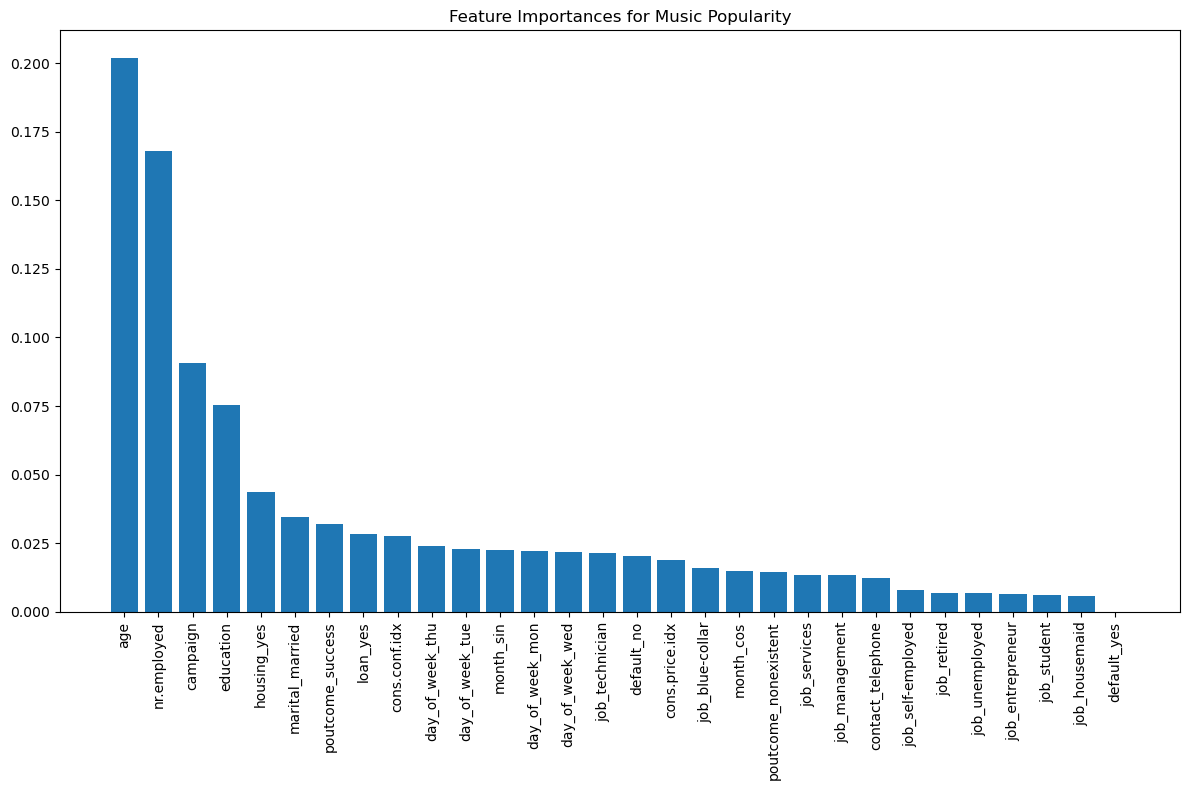

Top features (90% cumulative importance):

['age', 'nr.employed', 'campaign', 'education', 'housing_yes', 'marital_married', 'poutcome_success', 'loan_yes', 'cons.conf.idx', 'day_of_week_thu', 'day_of_week_tue', 'month_sin', 'day_of_week_mon', 'day_of_week_wed', 'job_technician', 'default_no', 'cons.price.idx', 'job_blue-collar', 'month_cos']

Refined feature set shape: (32940, 19)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y', 'duration']) , df['y'], test_size=0.2, random_state=42)

# Sample a subset 
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print("\nEvaluating feature importance using Random Forest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Music Popularity')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Select top features based on cumulative importance
cumulative_importance = np.cumsum(importances[indices])
n_features = np.where(cumulative_importance > 0.9)[0][0] + 1
top_features = [X_train.columns[i] for i in indices[:n_features]]
print(f"Top features (90% cumulative importance):\n\n{top_features}\n")

# Create refined dataset
df_important = X_train[top_features].copy()

# Retain custom features if not included
for feature in ['energy_to_acousticness_ratio', 'vocal_character']:
    if feature not in df_important.columns and feature in X_train.columns:
        df_important[feature] = X_train[feature]

print(f"Refined feature set shape: {df_important.shape}")

### ANN Model :
#### 1- Scaling :

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and 'target' is the popularity column
X = df[top_features] 
y = df['y']      

# Standardize the features

# For boolean features 
for column in X:
    if df[column].dtype == bool:
        df[column] = df[column].map({True: 1, False: 0})
        
# For numerical features
scaler = StandardScaler()
columns_to_exclude = ['age', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
X_scaled = X.copy()
X_scaled[X.columns.difference(columns_to_exclude)] = scaler.fit_transform(X[X.columns.difference(columns_to_exclude)])

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Preview
print("Preview of final scaled X values : ")
X.head()

Preview of final scaled X values : 


,age,nr.employed,campaign,education,housing_yes,marital_married,poutcome_success,loan_yes,cons.conf.idx,day_of_week_thu,day_of_week_tue,month_sin,day_of_week_mon,day_of_week_wed,job_technician,default_no,cons.price.idx,job_blue-collar,month_cos
0,1.533143,0.331695,0.0,1,False,True,False,False,0.886568,False,False,0.5,True,False,False,True,0.722628,False,-0.866025
1,1.629107,0.331695,0.0,4,False,True,False,False,0.886568,False,False,0.5,True,False,False,False,0.722628,False,-0.866025
2,-0.290177,0.331695,0.0,4,True,True,False,False,0.886568,False,False,0.5,True,False,False,True,0.722628,False,-0.866025
3,-0.002284,0.331695,0.0,2,False,True,False,False,0.886568,False,False,0.5,True,False,False,True,0.722628,False,-0.866025
4,1.533143,0.331695,0.0,4,False,True,False,True,0.886568,False,False,0.5,True,False,False,True,0.722628,False,-0.866025


#### 2. Defining The Model

We decided to go ahead and experiment with an **Artificial Neural Network (ANN)** model, as we have many features to handle, introducing several complex, non-linear relationships. We'll begin with a simple architecture:

- **Input Layer**: 19 neurons (corresponding to the total number of final chosen features)  
- **Hidden Layer 1**: 64 neurons, ReLU activation  
- **Hidden Layer 2**: 32 neurons, ReLU activation  
- **Output Layer**: 1 neuron, linear activation  


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layers
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer - for binary classification
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile with appropriate loss for binary classification
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Suitable for binary classification
    metrics=['accuracy', 'AUC']  # Track accuracy and AUC
)

/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-24 02:46:26.171562: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-04-24 02:46:26.171589: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-24 02:46:26.171593: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-24 02:46:26.171609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-24 02:46:26.171617: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.

#### 3. Training & Evaluating the Model

We're training the model on the **scaled `X` values** with the following configuration:

- **Epochs**: Number of times the model sees the full dataset (e.g., 100)  
- **Batch Size**: Number of samples processed before updating the model's weights (e.g., 32)  
- **Validation Split**: A portion of the training data reserved to monitor performance and prevent overfitting  

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # More patience
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

# Train with better parameters
history = model.fit(
    X_train, y_train,
    epochs=150, 
    batch_size=64,  # Try different batch size
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/150


2025-04-24 02:46:26.668629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


515/515 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - AUC: 0.6568 - accuracy: 0.7497 - loss: 0.5367 - val_AUC: 0.7738 - val_accuracy: 0.8932 - val_loss: 0.3012 - learning_rate: 0.0010
Epoch 2/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - AUC: 0.7237 - accuracy: 0.8953 - loss: 0.3088 - val_AUC: 0.7797 - val_accuracy: 0.8905 - val_loss: 0.2990 - learning_rate: 0.0010
Epoch 3/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - AUC: 0.7484 - accuracy: 0.8917 - loss: 0.3054 - val_AUC: 0.7756 - val_accuracy: 0.8893 - val_loss: 0.2979 - learning_rate: 0.0010
Epoch 4/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - AUC: 0.7444 - accuracy: 0.8951 - loss: 0.3003 - val_AUC: 0.7726 - val_accuracy: 0.8902 - val_loss: 0.2984 - learning_rate: 0.0010
Epoch 5/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - AUC: 0.7465 - accuracy: 0.8991 - loss: 0.2931 - val_AUC: 0.7715 - val_accuracy: 0.8927 - val_loss: 0.2979 - learning_rate: 0.0010
Epoch 6/150
515/515 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - AUC: 0.7503 - accuracy: 0.

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3636
           1       0.73      0.16      0.26       482

    accuracy                           0.89      4118
   macro avg       0.81      0.57      0.60      4118
weighted avg       0.88      0.89      0.86      4118



/var/folders/81/vw07xvx93g58v6nwmy2n02b00000gn/T/ipykernel_22708/2964765037.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


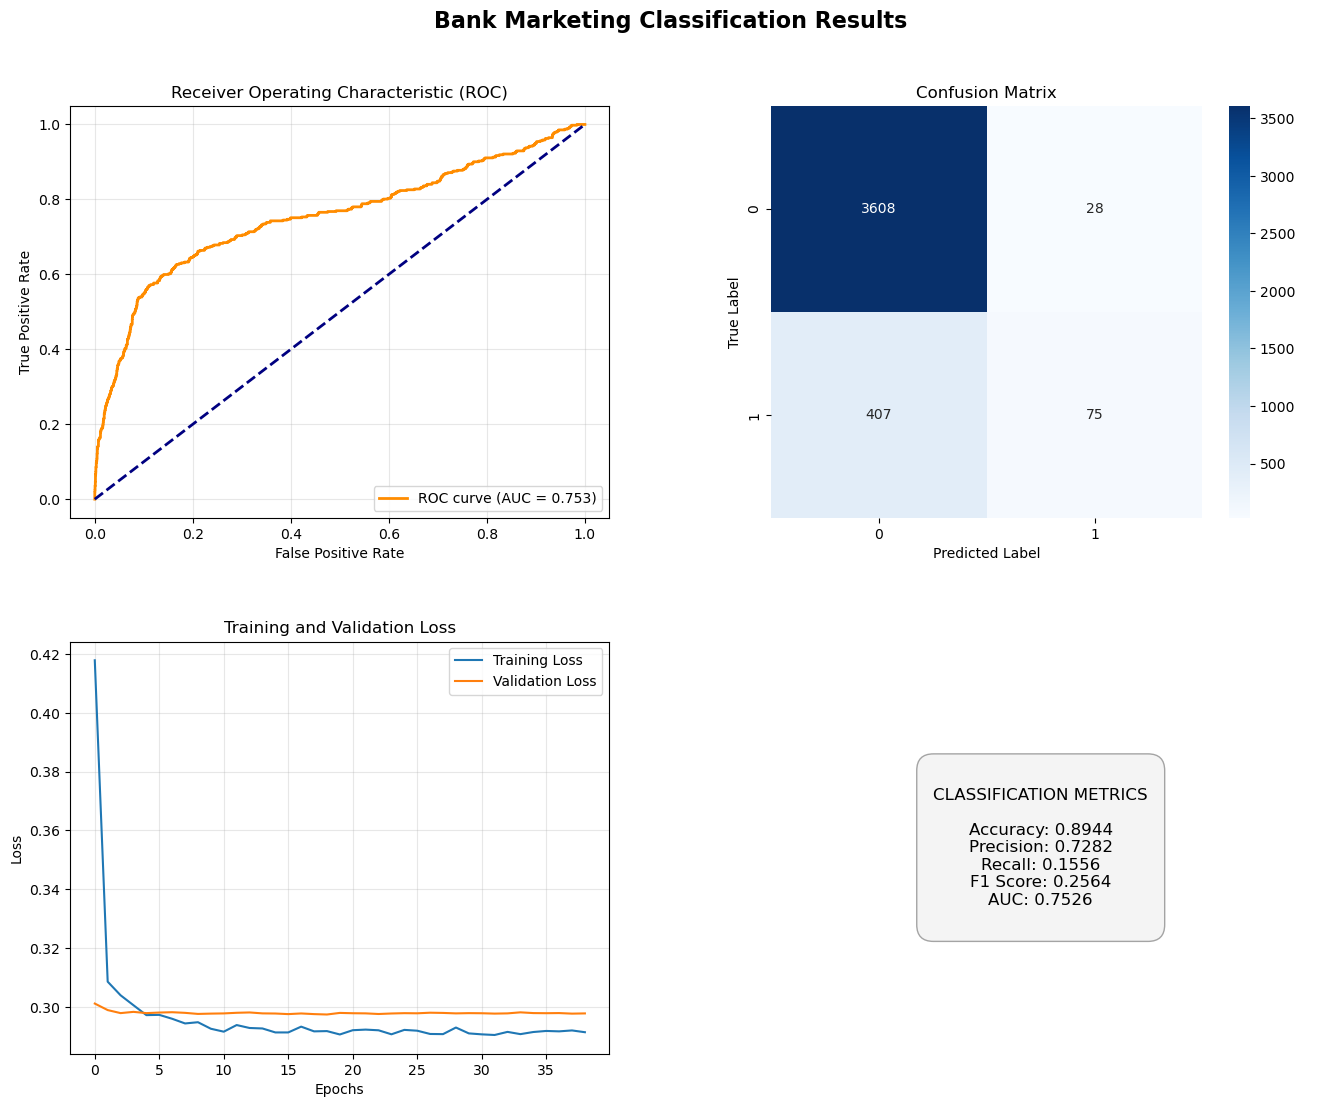

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Get probabilities
y_pred_prob = model.predict(X_test)
# Convert to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
print(classification_report(y_test, y_pred_binary))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Create visualization dashboard
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Bank Marketing Classification Results', fontsize=16, fontweight='bold')

# Define grid for subplots
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# ROC curve
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Confusion Matrix
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_title('Confusion Matrix')

# Training history
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(history.history['loss'], label='Training Loss')
ax3.plot(history.history['val_loss'], label='Validation Loss')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Loss')
ax3.set_title('Training and Validation Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Classification metrics table
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')
metrics_text = f"""
CLASSIFICATION METRICS

Accuracy: {accuracy_score(y_test, y_pred_binary):.4f}
Precision: {precision_score(y_test, y_pred_binary):.4f}
Recall: {recall_score(y_test, y_pred_binary):.4f}
F1 Score: {f1_score(y_test, y_pred_binary):.4f}
AUC: {roc_auc:.4f}
"""
ax4.text(0.5, 0.5, metrics_text, fontsize=12, 
         ha='center', va='center',
         bbox=dict(boxstyle="round,pad=1", facecolor='#f0f0f0', 
                  edgecolor='gray', alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#### 4- Cross Validation :

In [15]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Manual cross-validation loop
for train_idx, val_idx in kfold.split(X_scaled):
    # Split data
    X_train_cv, X_val_cv = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Train
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train_cv, y_train_cv,
        epochs=50,
        batch_size=64,
        validation_data=(X_val_cv, y_val_cv),
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate
    _, accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_scores.append(accuracy)

# Print results
print(f"CV Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the m

CV Accuracy: 0.8989 (±0.0027)


#### 5- Fine Tuning the hyper parameters :

In [20]:
import itertools
from tensorflow.keras.optimizers import Adam, RMSprop

# Define parameter grid
param_combinations = list(itertools.product(
    [32, 64, 128],  # batch_size
    [0.001, 0.01],  # learning_rate
    [0.2, 0.3],     # dropout_rate
    ['adam', 'rmsprop']  # optimizer
))

results = []

# Use a sample of the data for quicker hyperparameter tuning
train_idx, val_idx = train_test_split(np.arange(len(X_train)), test_size=0.3, random_state=42)
X_train_sample, X_val_sample = X_train.iloc[train_idx], X_train.iloc[val_idx]
y_train_sample, y_val_sample = y_train.iloc[train_idx], y_train.iloc[val_idx]

# Try each combination
for batch_size, learning_rate, dropout_rate, optimizer_name in param_combinations[:6]:  # Limit to 6 combinations for speed
    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    # Configure optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)
    
    # Compile
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    # Train
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train_sample, y_train_sample,
        epochs=30,  # Reduced for speed
        batch_size=batch_size,
        validation_data=(X_val_sample, y_val_sample),
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate
    _, accuracy = model.evaluate(X_val_sample, y_val_sample, verbose=0)
    
    # Store results
    params = {
        'batch_size': batch_size,
        'learning_rate': learning_rate,
        'dropout_rate': dropout_rate,
        'optimizer': optimizer_name,
        'accuracy': accuracy
    }
    results.append(params)
    print(f"Params: {params}")

# Find best parameters
best_params = max(results, key=lambda x: x['accuracy'])
print(f"\nBest parameters: {best_params}")

/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.001, 'dropout_rate': 0.2, 'optimizer': 'adam', 'accuracy': 0.9027524590492249}


/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.001, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'accuracy': 0.9006273746490479}


/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.001, 'dropout_rate': 0.3, 'optimizer': 'adam', 'accuracy': 0.902651309967041}


/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.001, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'accuracy': 0.8978951573371887}


/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.01, 'dropout_rate': 0.2, 'optimizer': 'adam', 'accuracy': 0.8957700729370117}


/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Params: {'batch_size': 32, 'learning_rate': 0.01, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'accuracy': 0.9008297920227051}

Best parameters: {'batch_size': 32, 'learning_rate': 0.001, 'dropout_rate': 0.2, 'optimizer': 'adam', 'accuracy': 0.9027524590492249}


#### Making predictions and Final Evaluation :

/Users/imadeddine/miniforge3/envs/datasci/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Final Test Accuracy: 0.8932
ROC AUC Score: 0.7609

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      3636
           1       0.69      0.16      0.26       482

    accuracy                           0.89      4118
   macro avg       0.79      0.58      0.60      4118
weighted avg       0.87      0.89      0.86      4118

Confusion Matrix:
 [[3601   35]
 [ 405   77]]


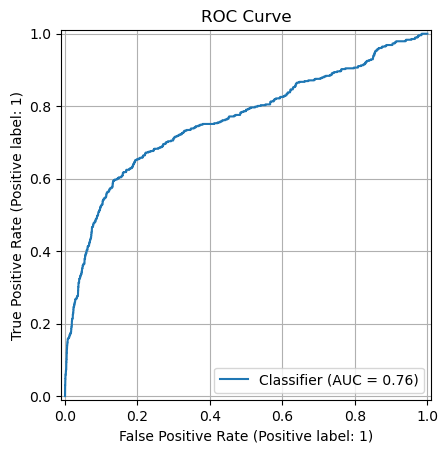

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Extract best parameters
best_batch_size = best_params['batch_size']
best_learning_rate = best_params['learning_rate']
best_dropout_rate = best_params['dropout_rate']
best_optimizer_name = best_params['optimizer']

# Rebuild final model with best params
final_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(best_dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=best_learning_rate) if best_optimizer_name == 'adam' else RMSprop(learning_rate=best_learning_rate)

final_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train final model
final_model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'],
                validation_split=0.2, callbacks=[EarlyStopping(patience=5, restore_best_weights=True)], verbose=0)

# Predict and evaluate
y_pred_probs = final_model.predict(X_test).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

print(f"\nFinal Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_probs):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
plt.title("ROC Curve")
plt.grid()
plt.show()